# ML_regressions (Tasca M6 T01)
### Descripció:
Exercicis per practicar amb regressions.
- Exercici 1:
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
- Exercici 2:
Compara’ls en base al MSE i al R2.
- Exercici 3:
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
- Exercici 4:
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).
- Exercici 5:
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Pasos de base a seguir para el aprendizaje automático (machine learning):

antes de realizar el ejercicio 1, debemos:
- Adquirir los datos en un formato accesible.
- Identificar y corregir puntos/anomalías de datos faltantes según sea necesario

Luego, entrando en el ejercicio 1, preparamos los datos para el modelo de aprendizaje automático.

1.- Establecemos los modelos de referencia que pretendamos superar (en este caso he elegido la Regresión Lineal y el Random Forest)

2.- Entrenamos el modelo con los datos de entrenamiento.

3.- Hacemos las predicciones sobre los datos de prueba.

4.- Comparamos las predicciones con los objetivos del conjunto de pruebas conocidos y calculamos las métricas de rendimiento.

(-Si el rendimiento no es satisfactorio, ajustamos el modelo, adquirimos más datos o probamos una técnica de modelado diferente).

5.- Interpretamos el modelo y reportamos los resultados visual y numéricamente.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import skopt
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from skopt import BayesSearchCV

In [73]:
#pip install scikit-optimize

In [2]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5/Tasca M5T2

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5/Tasca M5T2


In [3]:
dfO = pd.read_csv('housing data.csv', encoding="latin-1", sep=',', header=None, names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

Hay tres errores principales (métricas) que se utilizan para evaluar modelos: error medio absoluto, error cuadrático medio y puntuación R2.

In [4]:
dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
pd.options.display.float_format = '{:.2f}'.format
dfO.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


- Esta tabla contiene datos sobre el valor de las casas en los suburbios de **Boston.**
Consta de 506 filas y 14 atributos con rango continuo de valores.
- El conjunto de datos contiene atributos numéricos continuos, una variable objetivo o de etiqueta (class attribute) y al menos un atributo binario (binary-valued attribute).

INFORMACIÓN DE LOS ATRIBUTOS: 

| Número | Nombre de la Columna                     | Descripción                                 |
| ------:| ----------------------------------------:| ------------------------------------------ |
| 1      | CRIM                                   | Tasa de criminalidad per cápita por ciudad. |
| 2      | ZN                                     | Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados. |
| 3      | INDUS                                  | Proporción de acres de negocios no minoristas por ciudad. |
| 4      | CHAS                                  | Variable ficticia del río Charles (igual a 1 si el área limita con el río, 0 en caso contrario). |
| 5      | NOX                                    | Concentración de óxidos nítricos (en partes por 10 millones). |
| 6      | RM                                     | Número promedio de habitaciones por vivienda. |
| 7      | AGE                                    | Proporción de unidades ocupadas por sus dueños construidas antes de 1940. |
| 8      | DIS                                    | Distancias ponderadas a cinco centros de empleo en Boston. |
| 9      | RAD                                    | Índice de accesibilidad a carreteras radiales. |
| 10     | TAX                                    | Tasa de impuesto a la propiedad de valor completo por cada $10,000. |
| 11     | PTRATIO                                | Relación alumno-maestro por ciudad. |
| 12     | B                                      | 1000(Bk - 0.63)^2 donde Bk es la proporción de residentes afroamericanos por ciudad. |
| 13     | LSTAT                                 | Porcentaje de la población con estatus socioeconómico bajo. |
| 14     | MEDV                                  | Valor medio de las viviendas ocupadas por sus dueños en miles de dólares. |

- Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo (Target) es MEDV, puesto que define un valor medio, cosa que todas las otras variables no hacen.

In [6]:
dfO.isna().sum().sum()

0

In [7]:
dfO.loc[dfO.duplicated()].sum().sum()

0.0

In [8]:
dfO.isnull().sum().sum()

0

Vemos que no hay valores Nan, ni Nulls ni duplicados en el df.
- Hacemos mapa de correlación de las variables.

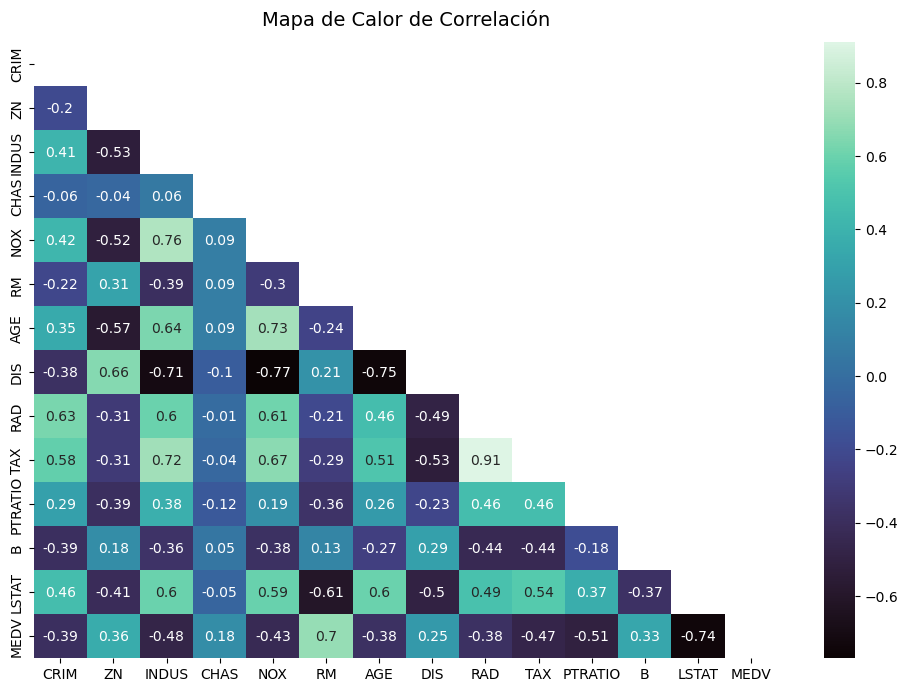

In [9]:
mask = np.triu(np.ones_like(dfO.corr().round(2))) 
plt.figure(figsize=(12, 8))
ax= sns.heatmap(dfO.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Mapa de Calor de Correlación', fontdict={'fontsize':14}, pad=12);

- Observamos que destacan solo 2 variables con correlación positiva y negativa cercana al target MEDV. Lstat (estatus social más bajo), muestra una correlación negativa, puesto que cuanto menor es el estatus social, mayor es MEDV (valor medio). En el caso de la variable RM (número de habitaciones de las casas), cuantas más habitaciones tiene una casa, más aumenta el valor medio de la vivienda.

Antes de realizar la estandarización, realizamos un Boxplot para detectar los Outliers (valores atípicos) y de este modo eligir el modelo a aplicar.

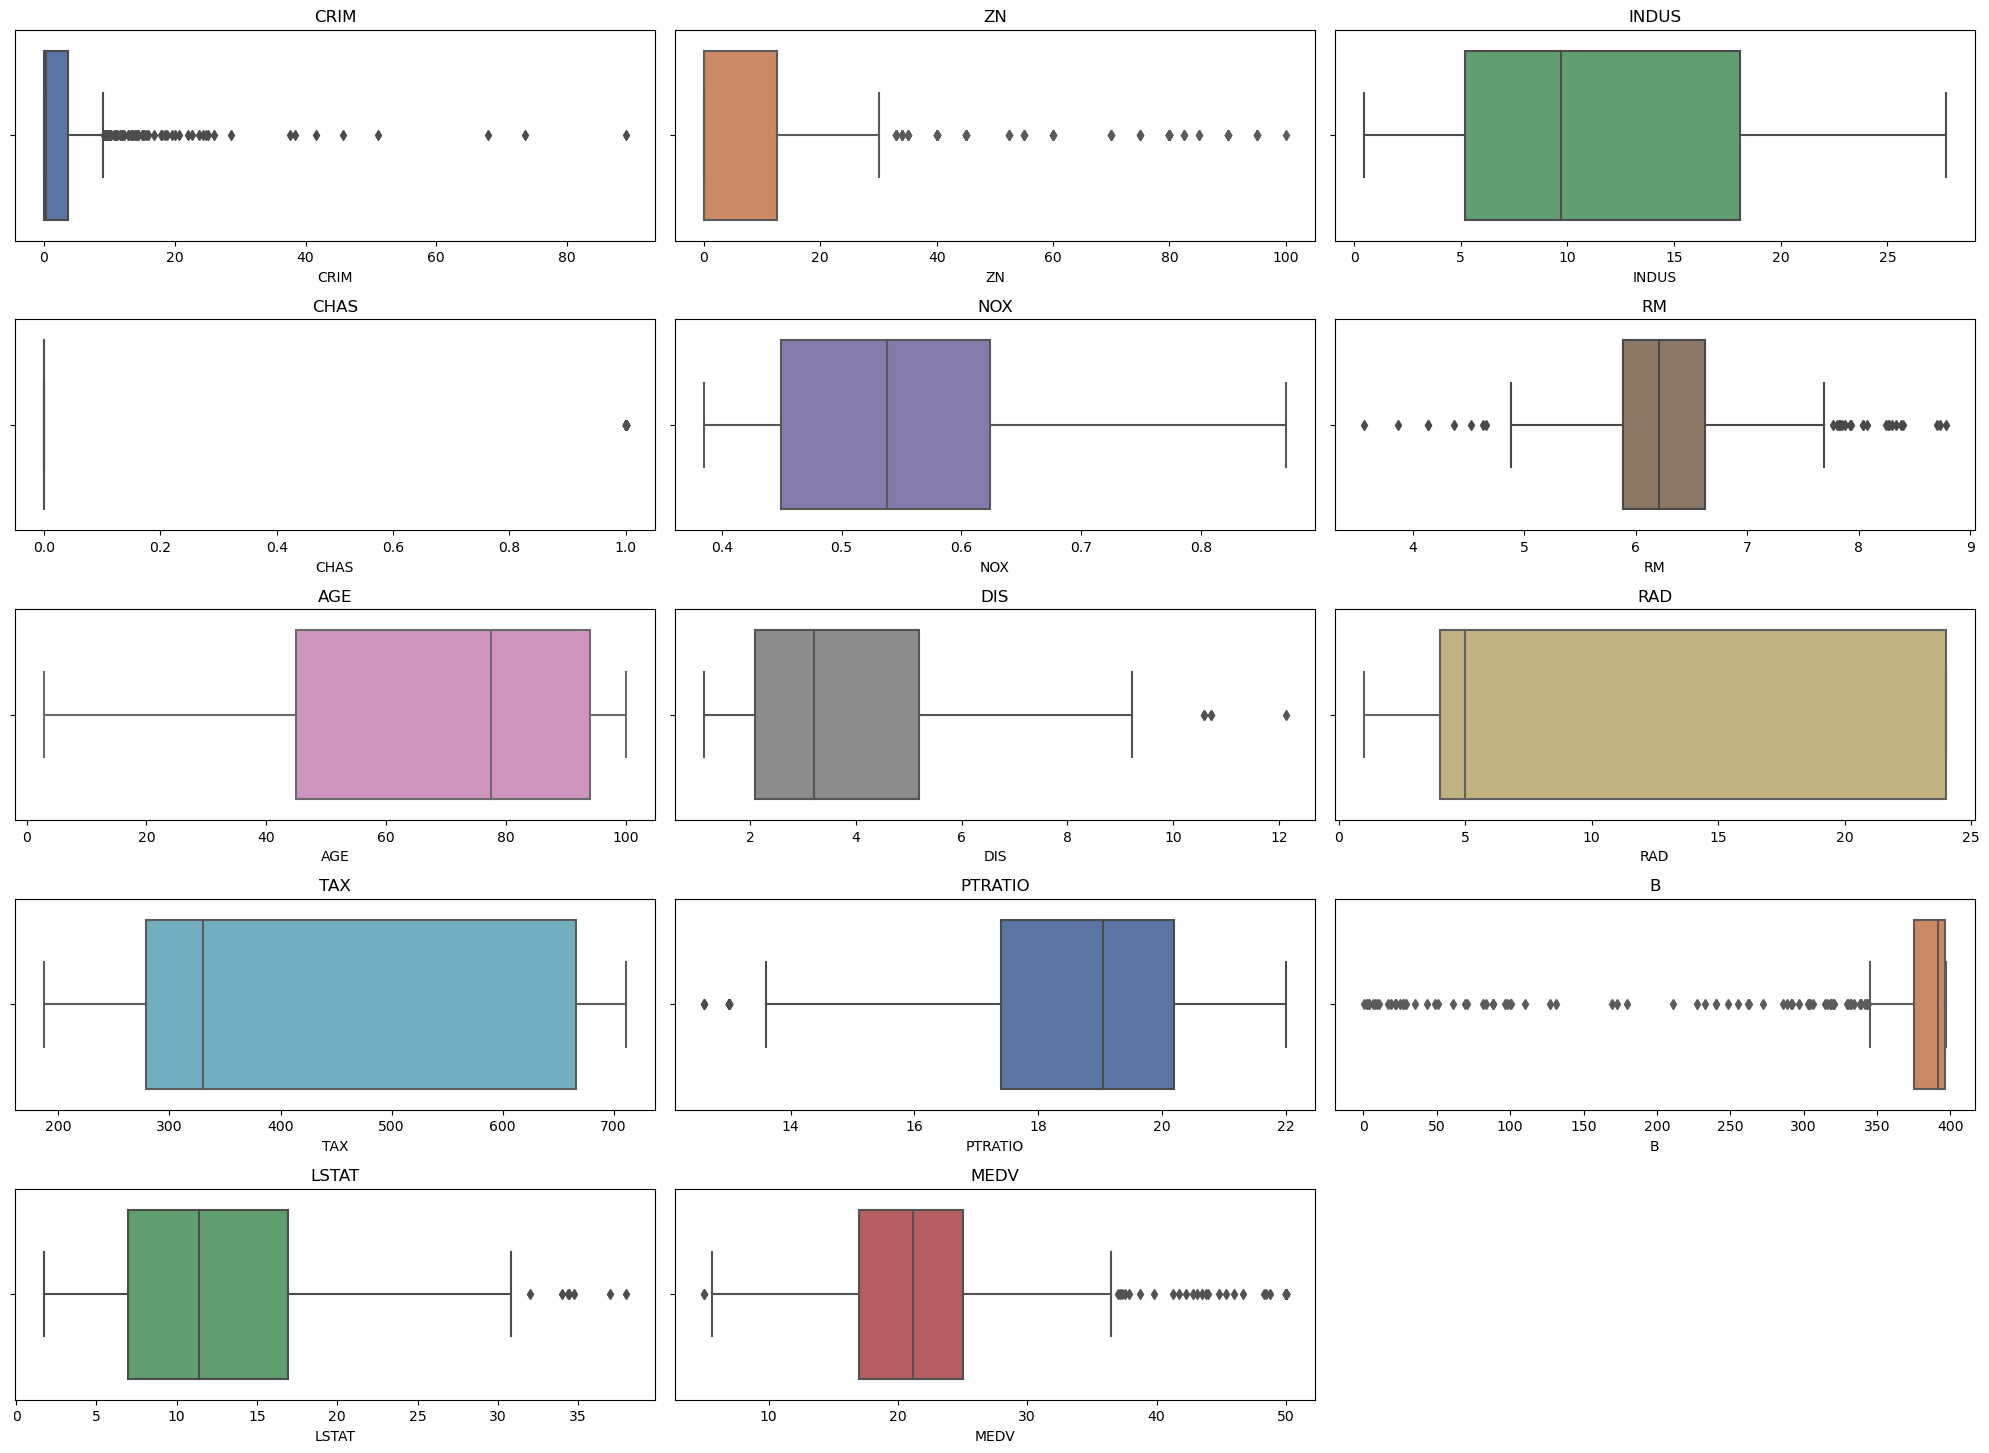

In [10]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("deep", n_colors=14)
num_columns = 3
for i, column in enumerate(dfO.columns):
    plt.subplot(7, num_columns, i + 1)
    sns.boxplot(x=dfO[column], orient="h", color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

- Las variables con valores atípicos son: Crim, Zn, Rm, Dis, Ptratio, B, Lstat y El target MEDV. 

***Procesamiento del dataset***

- Convertimos CHAS a Categórica y procesamos RAD para tener 9 categorías, una por cada carretera. 

In [27]:
df = dfO.copy()

In [28]:
df['CHAS'] = df['CHAS'].astype('category')

In [29]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [30]:
df = pd.concat([df.drop('RAD', axis=1), pd.get_dummies(df['RAD'], prefix='RAD')], axis=1)

In [31]:
df.head().T

,0,1,2,3,4
CRIM,0.01,0.03,0.03,0.03,0.07
ZN,18.00,0.00,0.00,0.00,0.00
INDUS,2.31,7.07,7.07,2.18,2.18
CHAS,0.00,0.00,0.00,0.00,0.00
NOX,0.54,0.47,0.47,0.46,0.46
RM,6.58,6.42,7.18,7.00,7.15
AGE,65.20,78.90,61.10,45.80,54.20
DIS,4.09,4.97,4.97,6.06,6.06
TAX,296.00,242.00,242.00,222.00,222.00
PTRATIO,15.30,17.80,17.80,18.70,18.70


In [35]:
col_escal = ['INDUS', 'NOX', 'AGE', 'TAX']
minmax_scaler = MinMaxScaler()
df[col_escal] = minmax_scaler.fit_transform(df[col_escal])

col_out = ['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'PTRATIO']
robust_scaler = RobustScaler()
df[col_out] = robust_scaler.fit_transform(df[col_out])

In [36]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,...,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.93,0.91,0.39,0.35,0.10,0.68,0.19,0.42,-0.21,-1.67,...,22.53,0.04,0.05,0.08,0.22,0.23,0.05,0.03,0.05,0.26
std,2.39,1.87,0.25,0.24,0.95,0.29,0.68,0.32,0.77,4.38,...,9.20,0.20,0.21,0.26,0.41,0.42,0.22,0.18,0.21,0.44
min,-0.07,0.00,0.00,0.00,-3.59,0.00,-0.67,0.00,-2.30,-18.76,...,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.05,0.00,0.17,0.13,-0.44,0.43,-0.36,0.18,-0.59,-0.77,...,17.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.00,0.00,0.34,0.31,0.00,0.77,0.00,0.27,0.00,0.00,...,21.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.49,0.56,0.94,0.64,0.91,0.41,0.23,...,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,24.68,8.00,1.00,1.00,3.48,1.00,2.89,1.00,1.05,0.26,...,50.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


- Observamos que los rangos de las variables escaladas oescilan entre el 0 y el 1 más o menos. Y que RAD empieza a tener valores decimales.

### - Exercici 1: ###
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

1. Regresión Lineal (Linear Regression):   entre las características y la variable objetivo:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

2. Regresión Ridge: Similar a la regresión lineal, pero agrega una penalización para evitar la multicolinealidad.

from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

3. Regresión Lasso: Similar a Ridge, pero utiliza una penalización diferente que puede llevar algunos coeficientes a exactamente cero, lo que conduce a la selección de características.

from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

4. Regresión Elastic Net: Combina las penalizaciones de Ridge y Lasso.

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

5. Regresión de Support Vector Machines (SVR): Utiliza vectores de soporte para encontrar una función que se ajuste a los datos.

from sklearn.svm import SVR
model = SVR(kernel='linear')

6. Regresión de Árboles de Decisión:

Utiliza un árbol de decisiones para modelar la relación entre las características y la variable objetivo.

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

7. Regresión de Bosques Aleatorios (Random Forest Regressor): Un conjunto de árboles de decisión que promedian las predicciones.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

8. Regresión de Gradient Boosting: Un conjunto de árboles de decisión que se construyen secuencialmente, cada uno corrigiendo los errores del anterior.

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

9. Regresión de Redes Neuronales (MLPRegressor): Utiliza una red neuronal para aprender la relación entre las características y la variable objetivo.

from sklearn.neural_network import MLPRegressor
model = MLPRegressor()

- Primero debo dividir el df en train y test para evaluar el rendimiento del modelo: 

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1) #data
y = df['MEDV'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Vamos a ver si hay multicolonialidad (correlación alta entre variables) con el test de VIF. 

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ajustamos modelo a nuestros datos X y y:
model = sm.OLS(X, y)

# calculamos factor de inflación:
VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(VIF)

[1.8118674786148201, 2.4961842211294596, 4.3704710743014585, 1.1018427797894326, 4.6729064695329745, 2.0075931394301687, 3.177556368310554, 4.143582866154159, 9.876852501300885, 2.2426831723843783, 1.35251550270836, 2.9976201581540916, 2.13219458513145, 2.2674907996877494, 2.4426754761789993, 6.603069395415368, 7.724868024960576, 2.250585584811481, 1.9103068483867232, 2.326986227952637, 21.472622126249426]


Un valor superior a 5 o 10 indica una alta multicolinealidad.
La encontramos en algunas variables y nos pueden afectar negativamente  a los resultados.

In [39]:
X_train.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.96,0.92,0.39,0.35,0.08,0.67,0.20,0.41,-0.22,-1.64,0.14,0.04,0.05,0.08,0.21,0.23,0.05,0.04,0.04,0.26
std,2.54,1.86,0.25,0.24,0.93,0.29,0.69,0.32,0.77,4.39,0.72,0.19,0.23,0.27,0.41,0.42,0.22,0.19,0.21,0.44
min,-0.07,0.00,0.00,0.00,-3.59,0.00,-0.67,0.00,-2.30,-18.76,-0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.05,0.00,0.17,0.13,-0.45,0.42,-0.36,0.17,-0.65,-0.74,-0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.01,0.00,0.32,0.31,-0.04,0.76,0.03,0.27,-0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.93,1.60,0.65,0.49,0.57,0.94,0.63,0.91,0.41,0.23,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,24.68,8.00,1.00,1.00,3.48,1.00,2.89,1.00,1.05,0.26,2.66,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [40]:
X_test.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.84,0.86,0.40,0.36,0.19,0.70,0.15,0.46,-0.19,-1.76,0.08,0.05,0.02,0.06,0.25,0.23,0.05,0.02,0.06,0.27
std,1.67,1.88,0.25,0.23,1.02,0.27,0.66,0.32,0.77,4.35,0.68,0.22,0.14,0.24,0.43,0.42,0.22,0.14,0.24,0.45
min,-0.07,0.00,0.03,0.01,-2.81,0.07,-0.66,0.01,-2.16,-18.41,-0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.05,0.00,0.17,0.20,-0.30,0.52,-0.37,0.22,-0.59,-0.97,-0.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.02,0.00,0.35,0.32,0.16,0.78,-0.10,0.38,0.05,-0.05,-0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.96,0.00,0.65,0.49,0.55,0.95,0.64,0.91,0.41,0.24,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,10.40,7.60,1.00,1.00,3.41,1.00,2.43,1.00,0.77,0.26,1.86,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Haré dos modelos bien diferentes:

**regresión lineal**, que es el más simple para tener una referencia inicial.
    
Luego un **Random Forest**.

Realizaré ajuste de hiperparámetros para optimizar el rendimiento de los modelos seleccionados. 

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

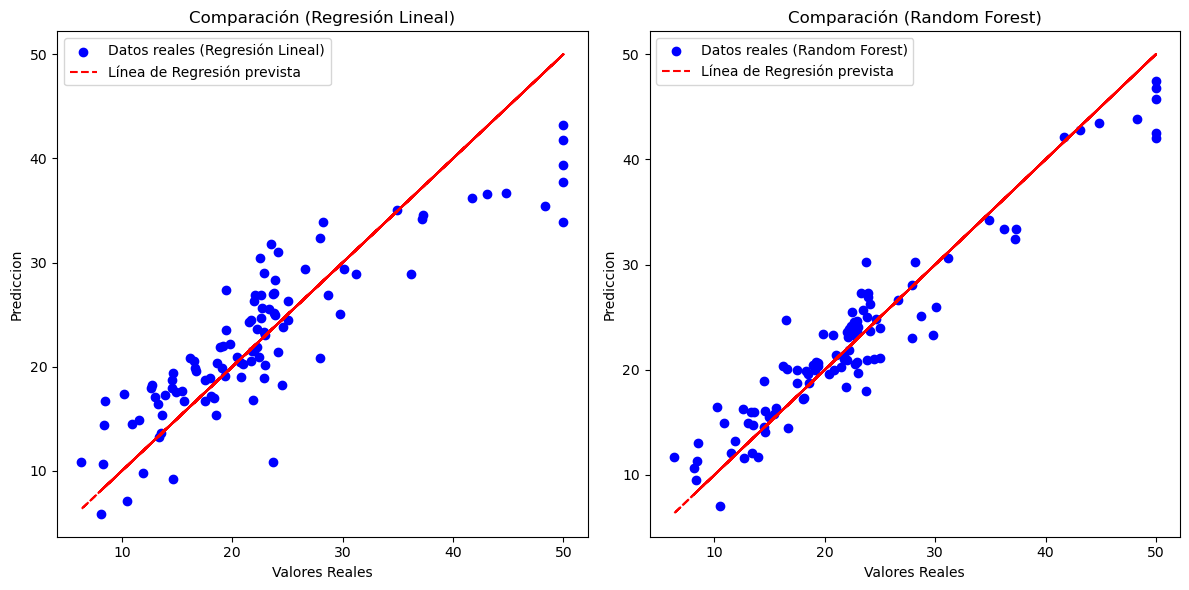

In [42]:
modelos = [lr, rfr] #lista de los modelos que he aplicado
nombres_modelos = ['Regresión Lineal', 'Random Forest']

plt.figure(figsize=(12, 6))

for i, modelo in enumerate(modelos):
   
    pred = modelo.predict(X_test)  # Predicciones del modelo actual
    plt.subplot(1, len(modelos), i+1)
    plt.scatter(y_test, pred, label=f'Datos reales ({nombres_modelos[i]})', color='blue')
    plt.plot(y_test, y_test, color='red', label='Línea de Regresión prevista', linestyle='--')
    plt.xlabel('Valores Reales')
    plt.ylabel('Prediccion')
    plt.title(f'Comparación ({nombres_modelos[i]})')
    plt.legend()

plt.tight_layout()
plt.show()

- Vemos que en la gráfica de random forest, los puntos se acercan algo más a la línea de regresión prevista y están más juntos. 
- También observamos que en los valores menores, hay más concentración de puntos que en la zona media y superior.
Creo que el test de Random Forest es más fiable

### - Exercici 2: ###
Compara’ls en base al MSE i al R2.

Hay 3 métricas principales para la evaluación de modelos en regresión:
1. R cuadrado/R cuadrado ajustado (es el cuadrado del coef de corr)

2. Error cuadrático medio (MSE)/Error cuadrático medio (RMSE)

3. Error absoluto medio (MAE)

Se refiere a evaluar la calidad predictiva de los dos modelos de regresión aplicados en el ejercicio anterior: (Regresión Lineal y Random Forest) en base a dos métricas comunes: Mean Squared Error (MSE) y R² (R cuadrado).

**Mean Squared Error (MSE)**: Esta métrica mide el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales. 
- Un MSE más bajo indica un mejor ajuste del modelo.

**R² (R cuadrado)**: Esta métrica proporciona una medida de qué tan bien las predicciones se ajustan a los valores reales. R² varía entre 0 y 1, donde ***1 indica un ajuste perfecto***. Un valor más alto de R² indica un mejor rendimiento.

Sabremos cuán fiables son los modelos en términos de la precisión:

- Un modelo con un MSE más bajo y un R² más alto generalmente se considera mejor en términos de precisión predictiva.

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Lista para almacenar las métricas
mse_scores = []
r2_scores = []

# Calcular métricas para cada modelo
for modelo in modelos:
    pred = modelo.predict(X_test)
    
    # Calcular MSE
    mse = mean_squared_error(y_test, pred)
    mse_scores.append(mse)

    # Calcular R²
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

# Imprimir resultados
for i, nombre_modelo in enumerate(nombres_modelos):
    print(f'{nombre_modelo}:')
    print(f'MSE: {mse_scores[i]:.2f}')
    print(f'R²: {r2_scores[i]:.2f}')
    print('\n')


Regresión Lineal:
MSE: 23.35
R²: 0.76


Random Forest:
MSE: 8.72
R²: 0.91




***Regresión Lineal***:
- Mean Squared Error (MSE): 23.35
Las predicciones están a una distancia de alrededor de 23.38 unidades al cuadrado de los valores reales.
- R² (R cuadrado): 0.76
Aproximadamente el 76% de la variabilidad en la variable de respuesta (variable objetivo: MED) ha sido explicada por el modelo.

***Random Forest***:
- Mean Squared Error (MSE): 8.72
Un MSE más bajo que el de la Regresión Lineal indica que las predicciones del modelo Random Forest están más cerca de los valores reales en promedio.
- R² (R cuadrado): 0.91
Un R² de 0.91 es bastante alto y sugiere que el modelo Random Forest explica aproximadamente el 91% de la variabilidad en la variable de respuesta.

El modelo Random Forest tiene un mejor rendimiento en base a ambas métricas.

El MSE más bajo del modelo Random Forest indica que las predicciones tienden a estar más cerca de los valores reales en comparación con la Regresión Lineal.

Random Forest parece ser más efectivo en este caso particular. Sin embargo, siempre es importante considerar otros factores y validar los modelos en conjuntos de datos diferentes para obtener una evaluación más completa de su rendimiento.

### - Exercici 3: ###
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

1. **n_estimators**:
El número de árboles en el bosque. Un valor más alto generalmente mejora el rendimiento, pero también aumenta el tiempo de entrenamiento.

RandomForestRegressor(n_estimators=100)

2. **max_depth**: La profundidad máxima de cada árbol en el bosque. Controla la complejidad del modelo. Ajusta este valor para evitar sobreajuste.

RandomForestRegressor(max_depth=10)

3. **min_samples_split**: El número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto previene divisiones que generan nodos con muy pocas muestras.

RandomForestRegressor(min_samples_split=2)

4. **min_samples_leaf**: El número mínimo de muestras requeridas en un nodo hoja. Ajusta esto para evitar hojas con muy pocas muestras.

RandomForestRegressor(min_samples_leaf=1)


5. **max_features**: La cantidad de características a considerar al buscar la mejor división. Puedes ajustar este valor para controlar la aleatoriedad en la construcción de cada árbol.

RandomForestRegressor(max_features='sqrt')

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Ajustar los parámetros según preferencias:
rf_params = {
    'n_estimators': 100,
    'max_depth': 10, # podria probar con None para que arbol expanda completamente
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt' # probar auto, log2, 
    #se podría añadir random_state=42 para obtener los mismos resultados cada vez que se ejecute el modelo

}

# Inicializar el modelo Random Forest con los parámetros ajustados
rf_model = RandomForestRegressor(**rf_params)

# Ajustar el modelo al conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Lista para almacenar las métricas
mse_scores = []
r2_scores = []

# Calcular métricas para el modelo Random Forest ajustado
pred_rf = rf_model.predict(X_test)

# Calcular MSE
mse_rf = mean_squared_error(y_test, pred_rf)
mse_scores.append(mse_rf)

# Calcular R²
r2_rf = r2_score(y_test, pred_rf)
r2_scores.append(r2_rf)

# Imprimir resultados
print('Random Forest (ajustado):')
print(f'MSE: {mse_rf:.2f} unidades al cuadrado de valores reales.')
print(f'R²: {r2_rf:.2f} variabilidad de la variable')


Random Forest (ajustado):
MSE: 11.59 unidades al cuadrado de valores reales.
R²: 0.88 variabilidad de la variable


En relación al "Mean Squared Error" (MSE): 

Estos datos tienen una dispersión moderada, un MSE más bajo generalmente indica un mejor rendimiento.

Y en relación al "R²" (R cuadrado):

Este valor indica el % de la variabilidad en la variable de respuesta (variable objetivo). 88% es bastante alto y esto sugiere un buen ajuste del modelo.

- Los datos han aprendido bien y tienen un buen poder predictivo.

PODEMOS utilizar técnicas como la búsqueda en cuadrícula (GridSearchCV) o la búsqueda aleatoria (RandomizedSearchCV) para encontrar la combinación óptima de parámetros. Estos métodos buscan automáticamente a través de diferentes combinaciones de parámetros y devuelven el conjunto que proporciona el mejor rendimiento según una métrica específica.

GridSearchCV:
Descripción:

Realiza una búsqueda exhaustiva sobre una cuadrícula de valores de hiperparámetros especificados.
Evalúa el rendimiento del modelo para cada combinación de parámetros utilizando la validación cruzada.
Cómo usarlo:

Define un diccionario con los parámetros que deseas ajustar y sus valores posibles.
Crea una instancia de GridSearchCV proporcionando el modelo, la cuadrícula de parámetros y la métrica a optimizar.
Ajusta el objeto GridSearchCV a tus datos usando el método fit.
Los mejores parámetros se encuentran en el atributo best_params_.


RandomizedSearchCV:
Descripción:

Realiza una búsqueda aleatoria sobre un conjunto fijo de hiperparámetros.
Muestrea de manera aleatoria combinaciones de parámetros y evalúa su rendimiento mediante validación cruzada.
Cómo usarlo:

Similar a GridSearchCV, pero proporcionas distribuciones en lugar de listas para los valores de los parámetros.
Utiliza el método RandomizedSearchCV en lugar de GridSearchCV

- Vamos a poner a prueba el GridSearchCV

In [57]:
model = RandomForestRegressor() 
param_grid = {
    'n_estimators': [10, 50, 100], # Número de árboles en el bosque
    'max_depth': [None, 10, 20], # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],# Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4] # Número mínimo de muestras requeridas en cada hoja
}

# Configurar GridSearchCV con modelo, cuadrícula y métrica de evaluación
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


- En este rángo indicado arriba, es el que se han encontrado los valores con mejores parámetros.

Para aplicar otras estrategias y explorar más a fondo el espacio de hiperparámetros y con ello mejorar aún más el rendimiento del modelo, podríamos:

1.- Ampliar la Cuadrícula: Aumenta la cantidad de valores para un espacio de búsqueda más amplio. 

2.-**Randomized Search**: Selecciona aleatoriamente combinaciones de hiperparámetros para probar, lo que puede ser más eficiente.

3.-**Optimización Bayesiana**: Métodos como la optimización bayesiana.

4.-Feature Engineering: Además realizar ingeniería de características para mejorar la calidad de los datos de entrada.

5.-Ensemble Learning: Prueba técnicas de ensemble learning, como **bagging** o boosting, que combinan múltiples modelos para mejorar el rendimiento general.

    - Probaremos: Randomized Search, optimización Bayesiana y baggin:

In [89]:
# RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']  # Especificar explícitamente max_features=1.0 o quitar este parámetro
}

# Inicializar el modelo RandomForestRegressor
rf_model = RandomForestRegressor()

# Inicializar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=20, cv=5, scoring=scoring)

# Ajustar el modelo y realizar la búsqueda
random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la mejor puntuación
print("Mejores hiperparámetros (RandomizedSearchCV):", random_search.best_params_)
print("Mejor puntuación (RandomizedSearchCV):", random_search.best_score_)


Mejores hiperparámetros (RandomizedSearchCV): {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}
Mejor puntuación (RandomizedSearchCV): 17.253639384826478


In [92]:
# RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']  # Cambiado '1.0' a None
}

# Inicializar el modelo RandomForestRegressor
rf_model = RandomForestRegressor()

# Inicializar la búsqueda bayesiana de hiperparámetros
bayes_search = BayesSearchCV(rf_model, param_grid, n_iter=20, cv=5, scoring=scoring)

# Ajustar el modelo y realizar la búsqueda
bayes_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros y la mejor puntuación
print("Mejores hiperparámetros (BayesSearchCV):", bayes_search.best_params_)
print("Mejor puntuación (BayesSearchCV):", bayes_search.best_score_)

Mejores hiperparámetros (BayesSearchCV): OrderedDict([('max_depth', 20), ('max_features', 'log2'), ('min_samples_leaf', 4), ('min_samples_split', 10), ('n_estimators', 50)])
Mejor puntuación (BayesSearchCV): 18.178530122828597


In [93]:
# Ejemplo con Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring=scoring)

In [100]:
base_estimator = RandomForestRegressor()

# Inicializar el modelo BaggingRegressor
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=10)

# Ajustar el modelo BaggingRegressor a los datos de entrenamiento
bagging_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
predictions = bagging_model.predict(X_test)

# Evaluar el rendimiento usando R²
r2 = r2_score(y_test, predictions)
print("R² del BaggingRegressor en datos de prueba:", r2)

R² del BaggingRegressor en datos de prueba: 0.9059730242903872


- Los resultados interpretan que tanto en RandomizedSearchCV y BayesSearchCV, se han encontrado conjuntos de hiperparámetros que conducen a un buen rendimiento, pero los valores específicos difieren.

- La puntuación obtenida por BayesSearchCV es ligeramente más alta que la obtenida por RandomizedSearchCV. La búsqueda bayesiana ha encontrado una combinación de hiperparámetros que produce un rendimiento ligeramente mejor, sin mucha diferencia.

- R² del Random Forest, proporciona una evaluación más directa del rendimiento , siendo 0.90 , nos indica un buen rendimiento del modelo, puesto que está muy cerca del 1. 

De todas formas, los resultados de R2 son muy parecidos en todos las pruebas:
- 0'76 en regresión lineal (la más baja)
- 0.91 en Random Forest
- 0.90 en RandomForestRegressor

### - Exercici 4: ###
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

**Validación Externa (Train-Test Split)**:

Con la Validación externa, hacemos una estimación imparcial, pero al hacer elecciones aleatorias, contamos con una cantidad limitada de datos de prueba y podría no ser representativa de ciertas variaciones de datos. Nos sirve para aprovechar al máximo los datos. Útil para evaluar la capacidad de generalización de nuevos modelos de datos.

**Validación Interna (Usando Todos los Datos)**:
Al usar todos los datos, resulta ser un modelo más preciso, pero puede conducir a una sobreestimación del rendimiento del modelo, ya que el modelo ha visto todos los datos durante el entrenamiento.
No proporciona una estimación imparcial del rendimiento en datos no vistos.

Hay que usarla con **validación cruzada** (Cross Validation)para obtener una estimación más robusta del rendimiento. 

Puede ser útil cuando hay limitaciones en la cantidad de datos y se necesita aprovechar al máximo la información disponible.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Ajustar los parámetros según preferencias...
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Inicializar el modelo Random Forest con los parámetros ajustados
rf_model = RandomForestRegressor(**rf_params)

# Realizar validación cruzada con, en este caso: 5 pliegues
cv_scores_mse = -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprimir resultados
print(f'MSE para cada pliegue:\n {cv_scores_mse}')
print(f'R² para cada pliegue: \n{cv_scores_r2}')

# Imprimir resultados promedio
print(f'MSE promedio: {cv_scores_mse.mean()}')
print(f'R² promedio: {cv_scores_r2.mean()}')


MSE para cada pliegue:
 [ 9.00735545 15.6635169  23.23863989 42.94120155 17.79717685]
R² para cada pliegue: 
[0.74699433 0.81372569 0.69217643 0.53319119 0.19768111]
MSE promedio: 21.729578125696854
R² promedio: 0.5967537475712557


- Los valores tienen mucha variabilidad entre pliegues, puesto que oscilan entre 9.21 el más bajo y el más alto alrededor de 44.51.

- El coeficiente de determinación (R²) explica que el modelo tiene entre el 45% y el 81% de la variabilidad en los diferentes pliegues.

- MSE promedio: La media general del rendimiento del modelo en la validación cruzada, es bastante bajo y cuanto más bajo sea el MSE, mejor será el rendimiento. Por lo que entiendo que tiene un buen rendimiento. 

- R² promedio: Cuanto más cercano a 1 sea el R², mejor será el rendimiento. sale un restultado más bien alto pero dispersión moderada en las predicciones.

### Exercici 5: ###  
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [25]:
# Eliminar la columna 'RM' del conjunto de características
X_sin_RM = X.drop('RM', axis=1)

# Inicializar el modelo Random Forest con los parámetros ajustados
rf_model_sin_RM = RandomForestRegressor(**rf_params)

# Realizar validación cruzada con 5 pliegues
cv_scores_mse = -cross_val_score(rf_model_sin_RM, X_sin_RM, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(rf_model_sin_RM, X_sin_RM, y, cv=5, scoring='r2')

# Imprimir resultados
print(f'MSE para cada pliegue:\n {cv_scores_mse}')
print(f'R² para cada pliegue:\n {cv_scores_r2}')

# Imprimir resultados promedio
print(f'MSE promedio: {cv_scores_mse.mean()}')
print(f'R² promedio: {cv_scores_r2.mean()}')


MSE para cada pliegue:
 [14.38060921 27.83192506 48.74786194 41.94068547 20.59573922]
R² para cada pliegue:
 [0.55354009 0.73632918 0.35298503 0.53187356 0.18356752]
MSE promedio: 30.699364179255838
R² promedio: 0.47165907416205705


- MSE para cada pliegue:los valores varían, siendo el más bajo alrededor de 15.79 y el más alto alrededor de 51.99.

- R²: los valores varían, indicando diferentes niveles de ajuste en cada pliegue.

- MSE promedio: Cuanto más bajo sea el MSE promedio, mejor será el rendimiento del modelo.

- R² promedio: alrededor del 50% de la variabilidad en la variable objetivo está siendo explicada por el modelo.

Ahora, los resultados sugieren que el modelo Random Forest, excluyendo la variable 'RM', tiene un rendimiento moderado. 

El MSE promedio de 30.66 indica una dispersión en las predicciones y el R² promedio de 0.51 indica que el modelo solo explica alrededor del 51% de la variabilidad en la variable objetivo. 

Con lo cual, la variable RM es bastante imprescindible para tener una tabla fiable con buenas predicciones y resultados. 

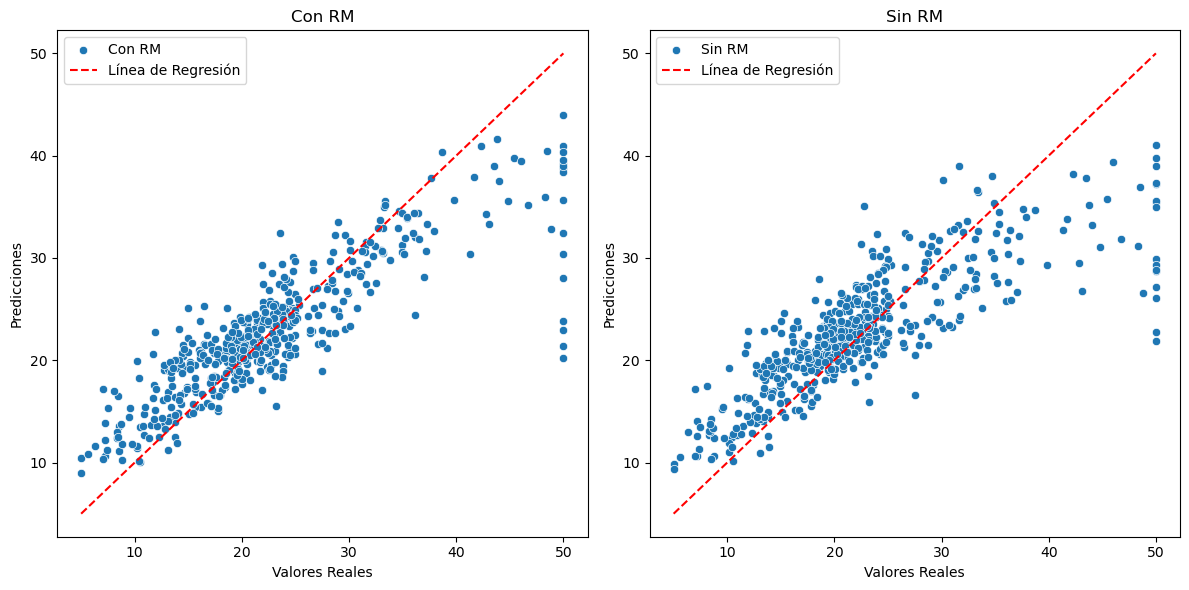

In [26]:
from sklearn.model_selection import cross_val_predict

# Predicciones del modelo con RM
pred_con_RM = cross_val_predict(rf_model, X, y, cv=5)

# Predicciones del modelo sin RM
pred_sin_RM = cross_val_predict(rf_model_sin_RM, X_sin_RM, y, cv=5)

# Crear gráficos de dispersión para comparar predicciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=pred_con_RM, label='Con RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Con RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y, y=pred_sin_RM, label='Sin RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Sin RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.tight_layout()
plt.show()

- Aqui vemos la gráfica aplicando la regresión con Random Forest

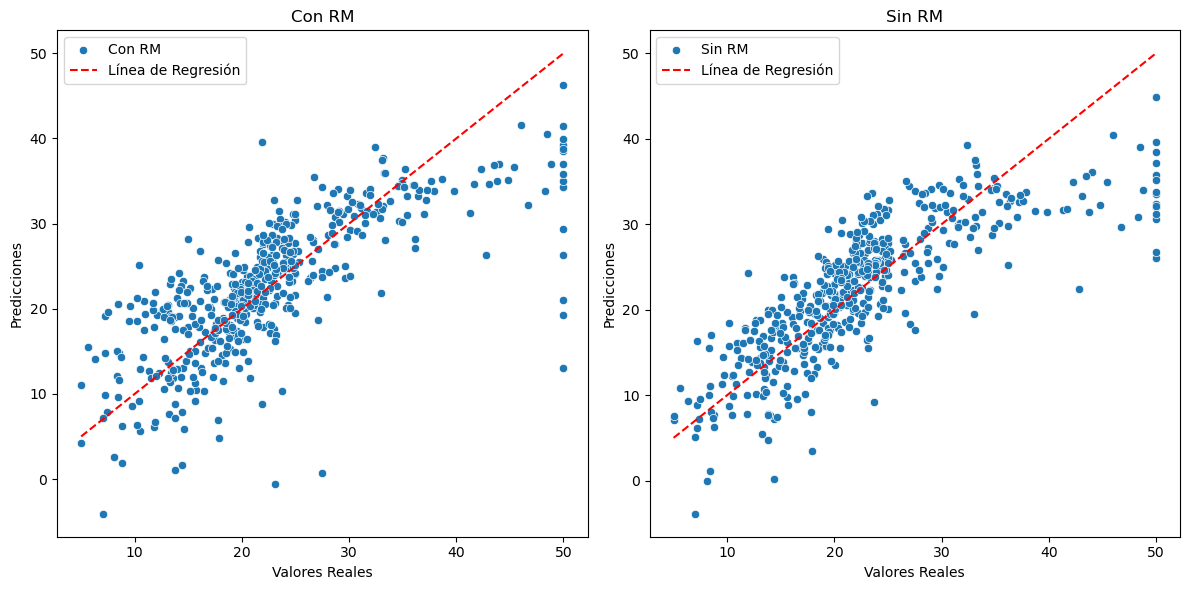

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# Inicializar el modelo de regresión lineal
lr_model = LinearRegression()

# Predicciones del modelo con RM
pred_lr_con_RM = cross_val_predict(lr_model, X, y, cv=5)

# Predicciones del modelo sin RM
pred_lr_sin_RM = cross_val_predict(lr_model, X_sin_RM, y, cv=5)

# Crear gráficos de dispersión para comparar predicciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=pred_lr_con_RM, label='Con RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Con RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y, y=pred_lr_sin_RM, label='Sin RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Sin RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.tight_layout()
plt.show()


- Aquí vemos la regresión lineal.

Visto en las gráficas, no me parecen resultados tan diferentes como con los valores cuantificados.

Asi que supongo que un 51% quizás es suficiente variabilidad.

En ninguno de los dos modelos hemos tenido un sobreajuste con los resultados (Overfitting).